# Feature selection

## Contents:

1. Pairplot visualization and domain knowlegde 
2. Filter methods
3. Wrapper methods

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, f_regression
from scipy.stats import pearsonr, spearmanr

## 1. Pairplot visualization and domain knowlegde 

### Main Objectives:

Remove:
- Constant or almost constant features
- Obviously irrelevant features with respect to the target
- Obviously redundant features

It is also always nice to have a visual idea of the relationships between features and between each feature and the target

### Pairplot visualization

Here are toy examples of pairplots. Each of these plots are independant.

![Toy example](figs/toy_ex.png)


#### QUESTIONS

For each of the following figures (ignore statistics related to each plot for now):

  1. Interpret the figure assuming that the x axis is a feature and the y axis the target. Would you keep the feature? 
  2. Interpret the figure assuming that both x and y axis are features. Would you keep both features? 


### Domain knowlegde

![Boston extended dataframe](figs/boston_preview.png)

Attribute Information (in order):
  - CRIM     $\quad$ per capita crime rate by town
  - ZN       $\quad$ proportion of residential land zoned for lots over 25,000 sq.ft.
  - INDUS    $\quad$ proportion of non-retail business acres per town
  - NOX      $\quad$ nitric oxides concentration (parts per 10 million)
  - RM       $\quad$ average number of rooms per dwelling
  - OLD      $\quad$ proportion of owner-occupied units built prior to 1940
  - NEW      $\quad$ proportion of owner-occupied units built after 1940
  - DIS      $\quad$ weighted distances to five Boston employment centres
  - RAD      $\quad$ index of accessibility to radial highways
  - TAX      $\quad$ full-value property-tax rate per $10,000
  - PTRATIO  $\quad$ pupil-teacher ratio by town
  - B        $\quad$ 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  - Bk       $\quad$ Proportion of blacks by town
  - LSTAT    $\quad$ % lower status of the population
  - MEDV     $\quad$ Median value of owner-occupied homes in $1000's

#### QUESTIONS

1. Read feature descriptions. Choose 2 features that could probably be removed. 


### Limits of pairplot visualization and domain knowlegde 
- What if 1000 features? The process is not automated...
- Subjective choice
- Only obvious things can be spotted

## 2. Filter methods

Filter methods select the most relevant features based on statistical measures of correlation or dependence between variables.

But... Which statistical tests to use? There are many tests and they are not always easy to interpret and we advise against using measures you do not understand. We will illustrate this fact with 3 statistical tests: Pearson and Spearman correlations and mutual information.

#### QUESTIONS

1. Read the short description of the python functions listed below and interpret their corresponding output given in the toy examples pairplots of section 1. 
2. For each of the 3 tests, give at least one disadvantage

#### Pearson correlation: linear relationship


[pearsonr()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) or [df.corr(method='pearson')](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The calculation of the p-value relies on the assumption that each dataset is normally distributed. The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.

#### Spearman correlation: monotonic relationship


[spearmanr()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) or [df.corr(method='spearman')](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)


The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

#### Mutual information 

[mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. This measure is NOT upper bounded as pearson and spearman coefficients are!

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances. It can be used for univariate features selection

### On the Boston dataset

We have extended the orginal Boston dataset and stored it into the ``boston_extended.csv`` file. 

In [2]:
df = pd.read_csv('boston_extended.csv',index_col=0)  # Load the dataset
cols = df.columns.tolist()
X = df[cols[:-1]]     # Store features in X
y = df[cols[-1]]      # Store target in y

# Split the datasets
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y, shuffle=True, test_size=0.2, random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, shuffle=True, test_size=0.5, random_state=3)

print('Training size:   ', len(y_train))
print('Validation size: ', len(y_val))
print('Test size:       ', len(y_test))

Training size:    404
Validation size:  51
Test size:        51


**TO DO**: 

1. Use [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to visualize the different relationships between the features and between each feature and the target (**WARNING** this might take a while. If your computer seems a bit weak don't insist)

**QUESTIONS**

1. Look at the pairplots of the features you would have removed in section 1. Do you confirm that you can remove these features? 
2. Are there other obvious features you can remove? 

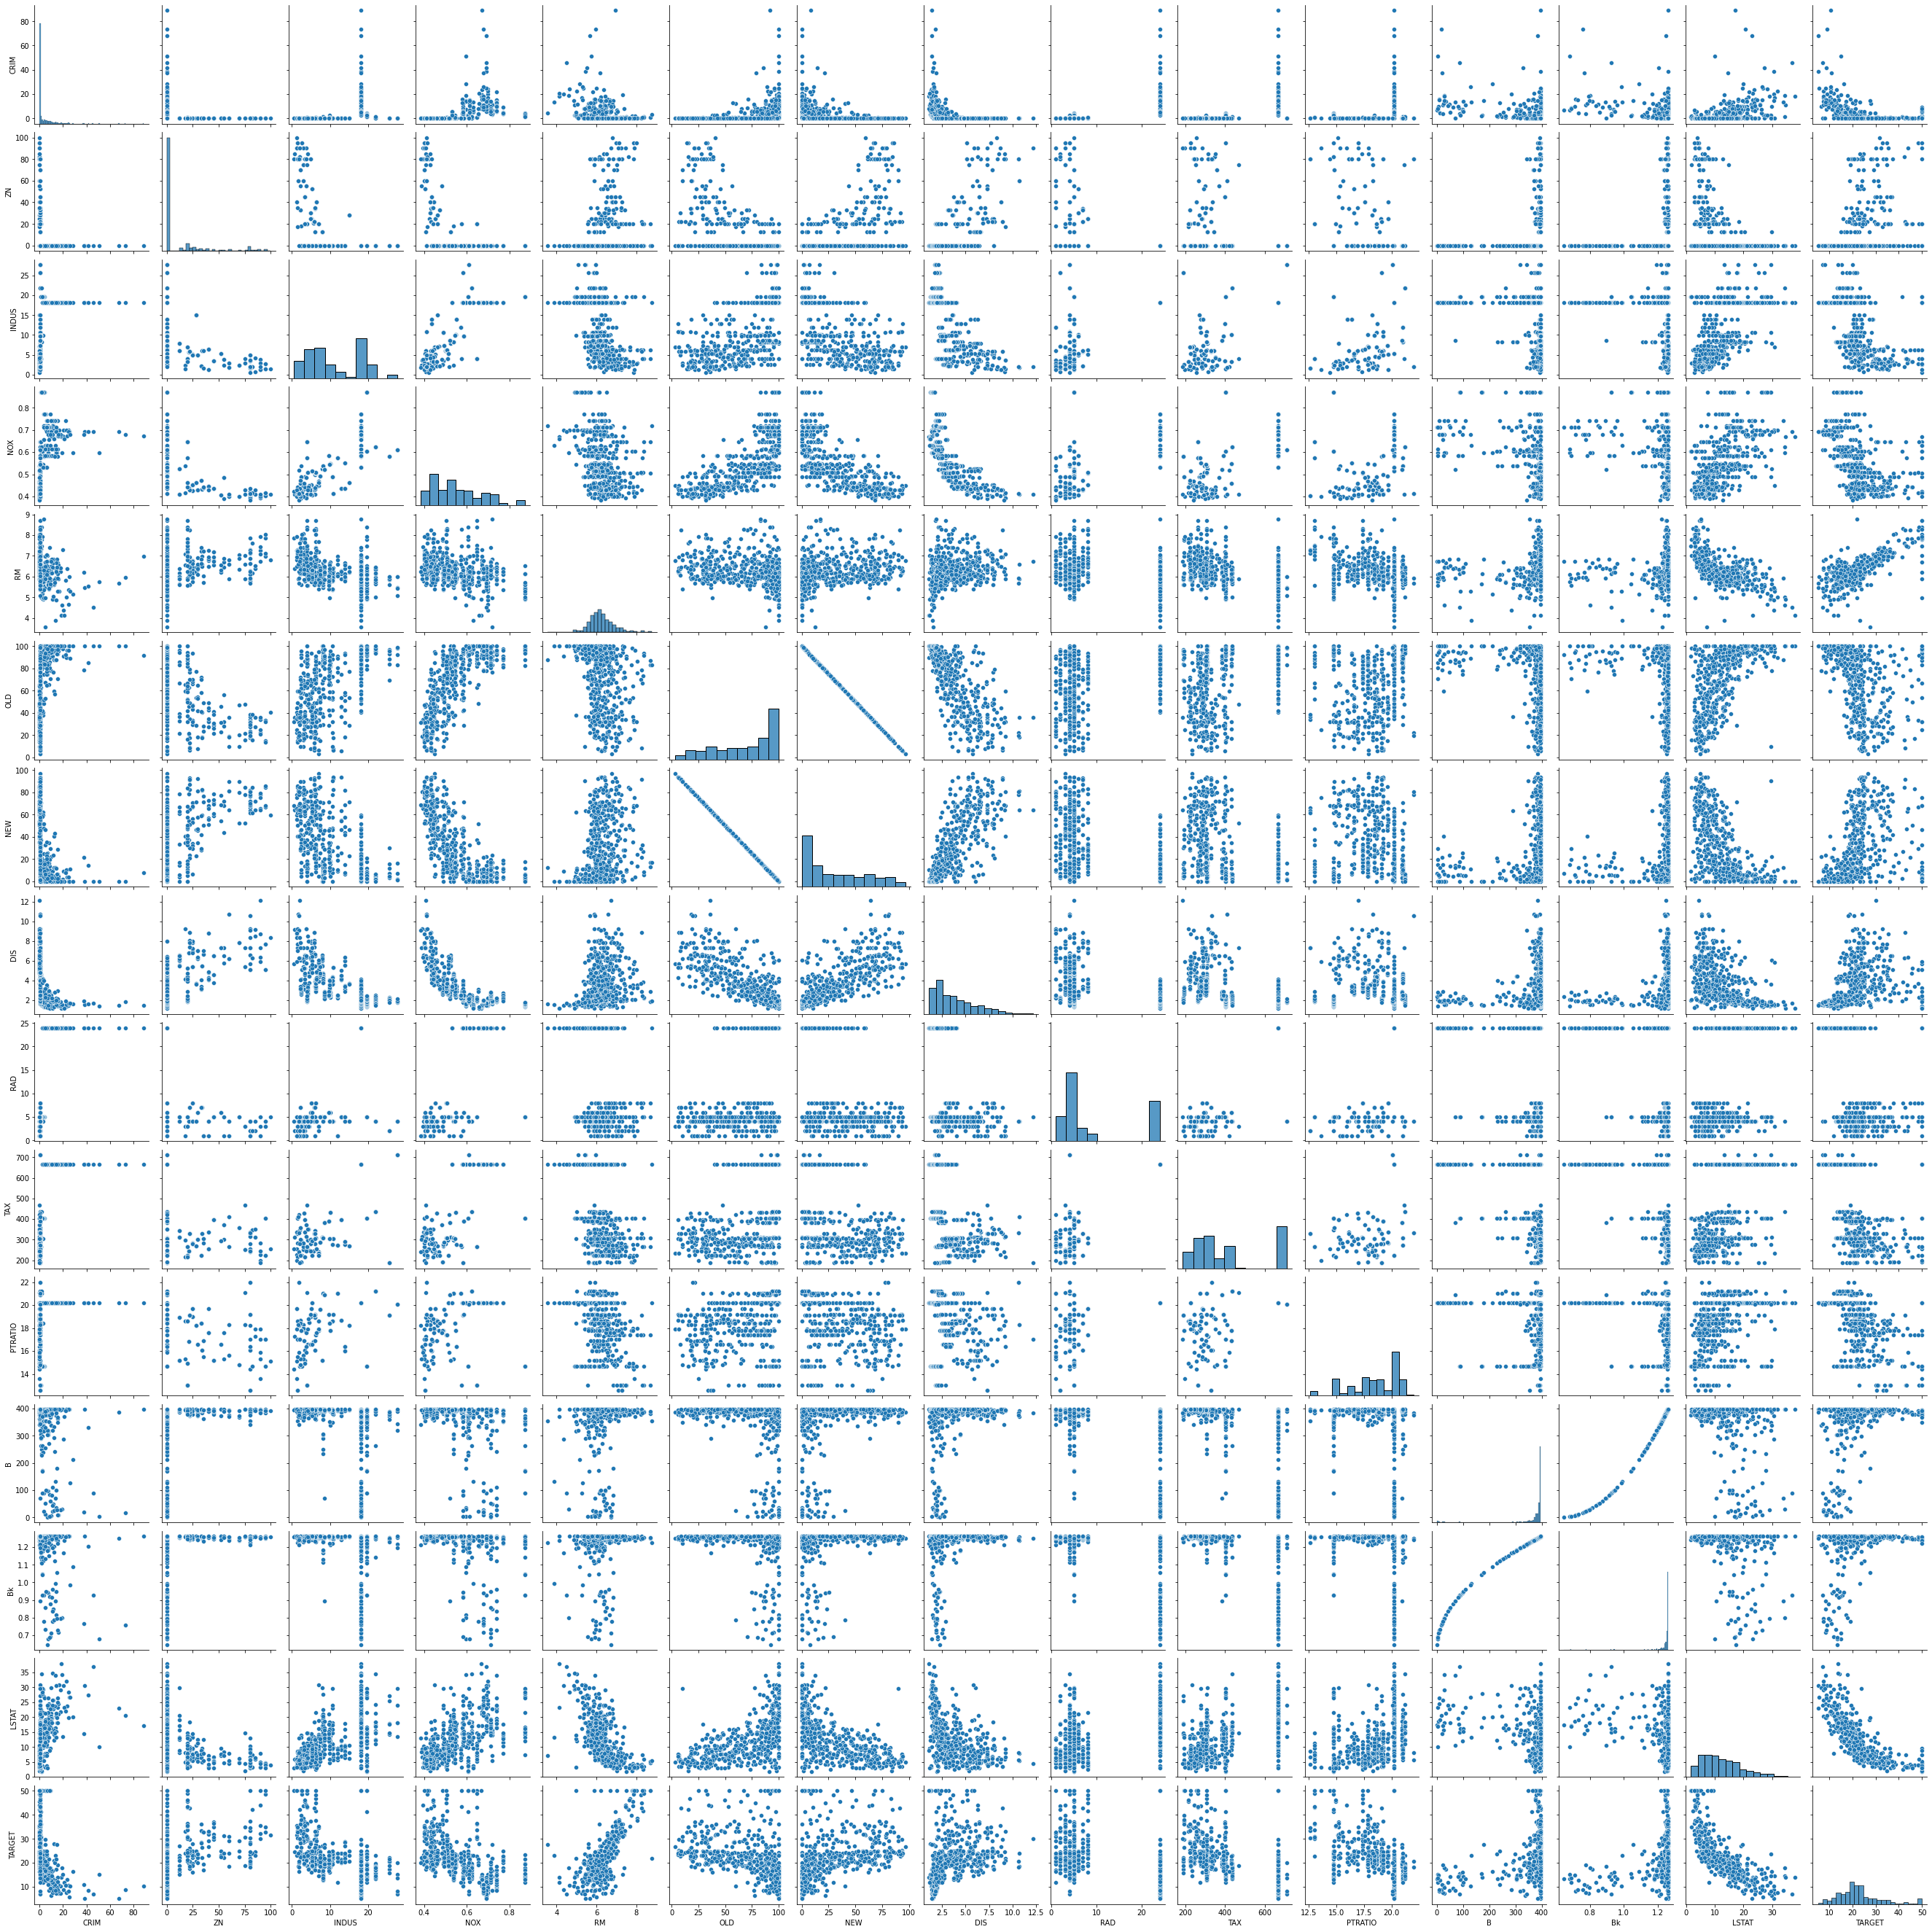

In [3]:
sns.pairplot(df)

## 3. Wrapper methods

Unlike filter methods, wrapper methods make use of a learning algorithm to select features. Instead of measuring the importance of each feature with statistical tests, it compares the machine learning performance of a given model trained with different features to select the best ones.  

### Forward selection

The objective of forward selection is to iteratively select the best features with respect to a base estimator starting from an empty set of features. In other words, at each iteration it selects the feature that maximizes the performance of a given model and add it to the set of selected feature. 

**TODO:** Write a function that implements the forward selection algorithm described below, using a linear regression model and the r2 score on the training dataset. (Read the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) documentation to find out how to get the r2 score)


  Input: ``data``, ``target``,``max_nb_features``
  
  0. Start with an empty list of ``best_features``, and a list of ``remaining_features`` initialized to the entire original   set of features
  1. While there are still remaining features and while you have fewer than ``nb_max_features`` features selected:
      1. Train a model using your target and your current best features with one extra feature from the remaining features   list
      2. Select the extra feature that maximizes the performance of the model.
      3. Add the selected feature to your best_features list and remove it from your remaining_features list


**TODO:** Write a function that implements the same algorithm but with a threshold on the score instead of a predefined max number of selected features (replace then the ``max_nb_features`` parameter with a ``threshold`` parameter)

**TODO:** Select the best $5$ features using ``forward_selection_max_nb_features`` on the training Boston dataset

**TODO:** Select the best features using ``forward_selection_threshold`` on the training Boston dataset with a threshold of $0.65$ then $0.7$ and $0.75$

In [4]:
#-----------------------------------------------
# Using a predefined max number of features
#-----------------------------------------------

def forward_selection_max_nb_features(data, target, max_nb_features):
    initial_features = data.columns.tolist()
    best_features = []
    remaining_features = initial_features.copy()
    while (len(remaining_features)>0) and (len(best_features)<max_nb_features):
        max_r2 = 0
        # Find the best feature
        for i, new_column in enumerate(remaining_features):
            # Compute the pvalues of the best features and the new column
            current_data = data[best_features+[new_column]]
            model = LinearRegression().fit(current_data,target)
            r2 = model.score(current_data, target)
            if r2 > max_r2:
                max_r2 = r2
                best_column = new_column
        # Add the best feature
        best_features.append(best_column)
        remaining_features.remove(best_column)
    return best_features


#-----------------------------------------------
# Using a threshold
#-----------------------------------------------

def forward_selection_threshold(data, target, threshold):
    initial_features = data.columns.tolist()
    best_features = []
    remaining_features = initial_features.copy()
    threshold_reached = False
    # Find the best feature
    while (len(remaining_features)>0) and not threshold_reached:
        max_r2 = 0
        for i, new_column in enumerate(remaining_features):
            # Compute the pvalues of the best features and the new column
            current_data = data[best_features+[new_column]]
            model = LinearRegression().fit(current_data,target)
            r2 = model.score(current_data, target)
            if r2 > max_r2:
                max_r2 = r2
                best_column = new_column
        if max_r2 < threshold:
            # Add the best feature
            best_features.append(best_column)
            remaining_features.remove(best_column)
        else:
            # Stop the algorithm
            threshold_reached = True
    return best_features

best01 = forward_selection_max_nb_features(X_train, y_train, 5)
best02 = forward_selection_threshold(X_train, y_train, 0.75)
print(best01)
print(best02)

['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX']
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'Bk', 'ZN', 'RAD', 'TAX', 'CRIM', 'OLD', 'INDUS', 'B', 'NEW']


#### Using sklearn 'SelectFromModel'

**TODO:** Use the [feature_selection.SelectFromModel()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) sklearn class to select a predefined number of features (try $2, 3$ and $5$) using a LinearRegression estimator. Use it on the training Boston dataset 

**TODO:** Use the [feature_selection.SelectFromModel()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) sklearn class to select features whose score are above thea given threshold using a LinearRegression estimator. Use it on the training Boston dataset 

**QUESTION**

What is the score implicitly used to select the features here?




In [5]:
#-----------------------------------------------
# Using a predefined max number of features
#-----------------------------------------------
max_features = 5
selector = SelectFromModel(
    estimator=LinearRegression(),
    max_features=max_features,
    threshold=0,
).fit(X_train, y_train)

best_cols = selector.get_support()
print("BEST ", max_features, " FEATURES: ", X.columns[best_cols].tolist())

#-----------------------------------------------
# Using a threshold
#-----------------------------------------------
selector = SelectFromModel(
    estimator=LinearRegression(),
    threshold=0.70,
).fit(X_train, y_train)

best_cols = selector.get_support()
selected_features =  X.columns[best_cols].tolist()
print("SELECTED ", len(selected_features), " FEATURES: ", selected_features)

BEST  5  FEATURES:  ['NOX', 'RM', 'DIS', 'PTRATIO', 'Bk']
SELECTED  5  FEATURES:  ['NOX', 'RM', 'DIS', 'PTRATIO', 'Bk']
